In [1]:
%matplotlib notebook

In [2]:
%matplotlib inline

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import healpy as hp
from scipy.stats import binned_statistic
import rubin_sim.maf as maf
from rubin_sim.data import get_baseline
import time
import sys
import sqlite3


# get just the first year of observations

In [4]:
baseline_db = "baseline_v3.0_10yrs.db"
year1_fname = 'first_year_{}.db'.format(baseline_db.split(".db")[0])

In [5]:
if not os.path.isfile(year1_fname): 
    print("get year 1 observations")
    conn = sqlite3.connect(baseline_db)
    df = pd.read_sql('select * from observations;', conn)
    df_year1 = df[df["night"]<366]
    conn.close()

    # open up a connection to a new database
    conn = sqlite3.connect(year1_fname)
    df_year1.to_sql('observations', conn, index=False, if_exists='replace')
    conn.close()
    
else:
    conn = sqlite3.connect(year1_fname)
    df_year1 = pd.read_sql('select * from observations;', conn)
    conn.close()

In [27]:
# set up slicer for metrics
# nside = 256
nside = 32
hp_slice = maf.HealpixSlicer(nside=nside)

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


# run some metrics on the baseline and reduced datasets

In [7]:
# load the database files
nside_file = 256
# nside_file = 32
template_timescale = 28
fname = "visit_cut_t-{}d_nside-{}.db".format(template_timescale,nside_file)

opsim_list = [year1_fname]
for t in [28,112,168]:
    opsim_list.append("visit_cut_t-{}d_nside-{}.db".format(t,nside_file))

In [8]:
opsim_list

['first_year_baseline_v3.0_10yrs.db',
 'visit_cut_t-28d_nside-256.db',
 'visit_cut_t-112d_nside-256.db',
 'visit_cut_t-168d_nside-256.db']

# plot the cumulative number of visits/pairs as a function of the night

Be careful to use the correct slicer/metric! e.g. a time slicer for looking at nights and a spatial slicer for looking at area.

When template generationis considered, there should be zero visits until the first template generation time

In [9]:
run_dict_visits_night = {}
nights = np.arange(0, 365, 1)
s = maf.OneDSlicer(sliceColName="night", bins = nights)
    
for i in range(len(opsim_list)):
    opsdb = maf.OpsimDatabase(opsim_list[i])
    runName = os.path.split(opsdb)[-1].replace('.db', '')
    print(runName)

    bdict = {}
    for f in 'ugrizy':
        m = maf.metrics.CountMetric(col="night", metricName='Count')
        constraint = f'filter == "{f}"'
        bdict[f] = maf.MetricBundle(m, s, constraint, runName=runName)

    g = maf.MetricBundleGroup(bdict, opsdb, 'temp')
    g.runAll()
    
    run_dict_visits_night[runName] = bdict

first_year_baseline_v3.0_10yrs
Querying table None with constraint filter == "i" for columns ['night']
Found 52835 visits
Running:  ['i']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "u" for columns ['night']
Found 10136 visits
Running:  ['u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "g" for columns ['night']
Found 15615 visits
Running:  ['g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "r" for columns ['night']
Found 49269 visits
Running:  ['r']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "y" for columns ['night']
Found 48790 visits
Running:  ['y']


/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "z" for columns ['night']
Found 39733 visits
Running:  ['z']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
visit_cut_t-28d_nside-256
Querying table None with constraint filter == "i" for columns ['night']


/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)


Found 41038 visits
Running:  ['i']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "u" for columns ['night']
Found 3244 visits
Running:  ['u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "g" for columns ['night']
Found 7726 visits
Running:  ['g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "r" for columns ['night']
Found 39735 visits
Running:  ['r']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "y" for columns ['night']
Found 33843 visits
Running:  ['y']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "z" for columns ['night']


/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs

Found 29690 visits
Running:  ['z']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
visit_cut_t-112d_nside-256
Querying table None with constraint filter == "i" for columns ['night']
Found 26121 visits
Running:  ['i']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "u" for columns ['night']
Found 1395 visits
Running:  ['u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "g" for columns ['night']


/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs

Found 3033 visits
Running:  ['g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "r" for columns ['night']
Found 26720 visits
Running:  ['r']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "y" for columns ['night']
Found 22486 visits
Running:  ['y']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "z" for columns ['night']
Found 19526 visits
Running:  ['z']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
visit_cut_t-168d_nside-256
Querying table None with constraint filter == "i" for columns ['night']


/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs

Found 20044 visits
Running:  ['i']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "u" for columns ['night']
Found 1202 visits
Running:  ['u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "g" for columns ['night']
Found 2739 visits
Running:  ['g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "r" for columns ['night']
Found 20772 visits
Running:  ['r']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "y" for columns ['night']
Found 17922 visits
Running:  ['y']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "z" for columns ['night']
Found 1

/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/slicers/oneDSlicer.py:108: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices, and may result in poor binsize choices (although these may potentially be ok). A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)
/Users/jrobinson/miniconda3/envs

In [10]:
# masked array filled vs compressed?
run_dict_visits_night["visit_cut_t-28d_nside-256"]["z"].metricValues.compressed()
# run_dict_visits_night["visit_cut_t-28d_nside-256"]["z"].metricValues.filled()

array([165., 131., 161.,  61.,  57., 185., 120., 153., 156., 189., 122.,
       130.,  58., 152., 152., 165., 174.,  86., 113., 180.,  52.,  70.,
       176., 148., 170.,  94., 178., 130., 272., 146.,  24., 142., 161.,
        43., 220., 138., 110., 306.,  73.,  98., 212., 168.,  49., 164.,
       113., 164., 153., 130., 225., 238., 135., 184., 159., 156., 200.,
        98., 173., 189., 285., 209., 280., 196.,  72., 257., 253., 307.,
       251., 150., 168., 266.,  37., 183.,  89., 216., 128., 159.,  61.,
       158., 186., 162., 173., 188., 270., 319., 204., 252., 135., 115.,
        91., 264., 352., 363., 198., 157., 228., 356., 209., 238., 271.,
       396., 168., 285., 277., 276., 305., 186.,  88., 345.,  79., 282.,
       279., 212., 239., 450., 136., 142., 294., 105., 344., 206., 211.,
       311., 245., 202., 113., 442., 414.,  50.,  72.,  96., 132., 206.,
       149.,  97.,  21.,  74., 283., 128., 264., 220., 130., 283., 199.,
       279.,  98., 220., 261., 253., 348., 304., 35

In [11]:
# x = run_dict_visits_night["visit_cut_t-28d_nside-32"]["z"].metricValues
x = run_dict_visits_night["visit_cut_t-28d_nside-256"]["z"].metricValues
x_data = x.data
x_mask = x.mask
len(x_data[x_mask])

205

In [12]:
len(x_data[~x_mask])

159

In [13]:
# y = run_dict_visits_night["visit_cut_t-28d_nside-32"]["z"].slicer.slicePoints["sid"]
y = run_dict_visits_night["visit_cut_t-28d_nside-256"]["z"].slicer.slicePoints["sid"]

In [14]:
len(x),len(y)

(364, 364)

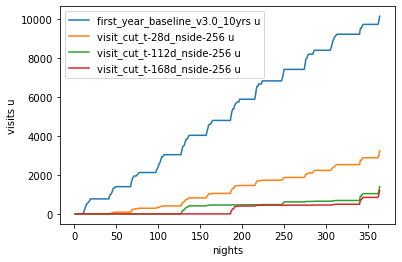

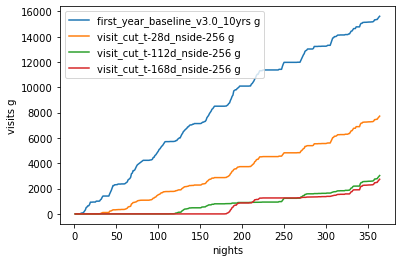

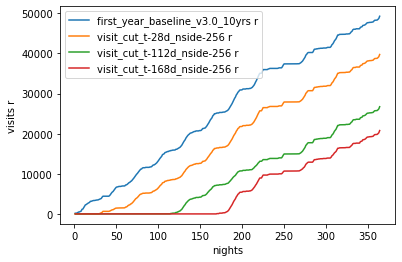

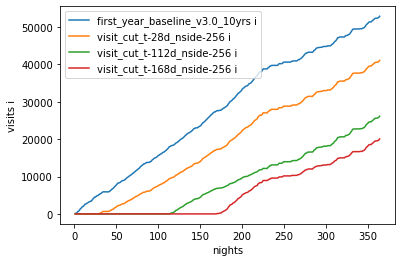

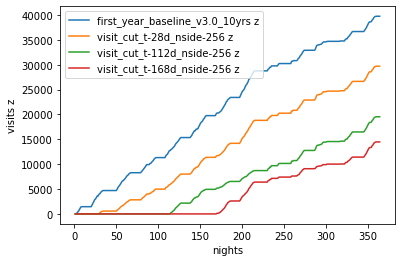

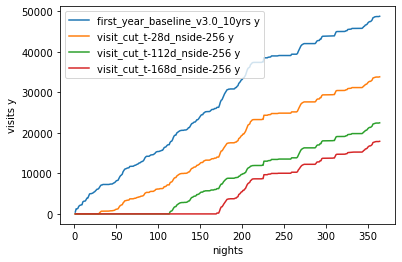

In [15]:
for f in 'ugrizy':

    fig = plt.figure()
    gs = gridspec.GridSpec(1,1)
    ax1 = plt.subplot(gs[0,0])
    
    for r in run_dict_visits_night.keys():
        
        y = run_dict_visits_night[r][f].metricValues.filled()
        x = run_dict_visits_night[r][f].slicer.slicePoints["bins"][1:]
#         ax1.plot(x, y, label="{} {}".format(r,f))
        ax1.plot(x, y.cumsum(), label="{} {}".format(r,f))
    
    ax1.legend()
    ax1.set_xlabel("nights")
    ax1.set_ylabel('visits {}'.format(f))

#     ax1.set_xlim(0,50)
#     ax1.set_ylim(0,50000)

    plt.show()

# Compare Nvisit

Can we mask the deep drilling fields and focus on WFD?

In [28]:
run_dict_visits = {}

for i in range(len(opsim_list)):
    opsdb = maf.OpsimDatabase(opsim_list[i])
    runName = os.path.split(opsdb)[-1].replace('.db', '')
    print(runName)

    bdict = {}
    for f in 'ugrizy':
        m = maf.metrics.CountMetric(col='observationStartMJD', metricName='Nvisits')
        constraint = f'filter == "{f}"'
        bdict[f] = maf.MetricBundle(m, hp_slice, constraint, runName=runName)

    g = maf.MetricBundleGroup(bdict, opsdb, 'temp')
    g.runAll()
    
    run_dict_visits[runName] = bdict

first_year_baseline_v3.0_10yrs
Querying table None with constraint filter == "i" for columns ['fieldRA', 'rotSkyPos', 'observationStartMJD', 'fieldDec']
Found 52835 visits
Running:  ['i']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "u" for columns ['fieldRA', 'rotSkyPos', 'observationStartMJD', 'fieldDec']
Found 10136 visits
Running:  ['u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "g" for columns ['fieldRA', 'rotSkyPos', 'observationStartMJD', 'fieldDec']
Found 15615 visits
Running:  ['g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter == "r" for columns ['fieldRA', 'rotSkyPos', 'observationStartMJD', 'fieldDec']
Found 49269 visits
Running:  ['r']
Completed metric generation.
Running reduce methods.
Running summ

In [29]:
run_dict_visits.keys()

dict_keys(['first_year_baseline_v3.0_10yrs', 'visit_cut_t-28d_nside-256', 'visit_cut_t-112d_nside-256', 'visit_cut_t-168d_nside-256'])

In [30]:
bdict.keys()

dict_keys(['u', 'g', 'r', 'i', 'z', 'y'])

In [31]:
run_dict_visits[runName]["r"].slicer

In [32]:
bdict["r"].slicer

0.0 180.0 -180.0 180.0


0.0 180.0 -180.0 180.0


0.0 180.0 -180.0 180.0


0.0 180.0 -180.0 180.0


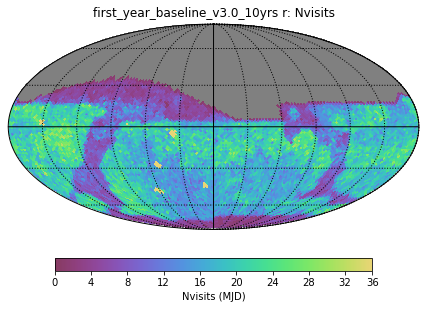

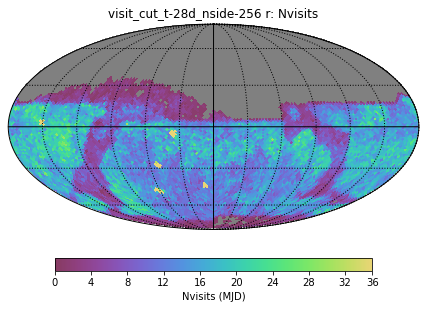

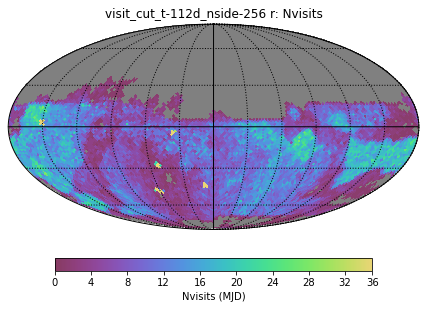

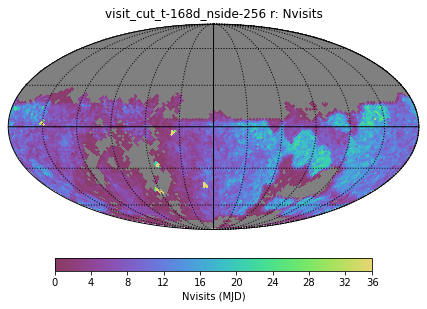

In [33]:
ph = maf.PlotHandler(outDir='temp', thumbnail=False)

plotDict = {'colorMin': 0, 'colorMax': 35}

for r in run_dict_visits.keys():
    bdict = run_dict_visits[r]
    
    # for f in 'ugrizy':
    for f in 'r':
        print(bdict[f].slicer)
        ph.setMetricBundles([bdict[f]])
        ph.plot(plotFunc=maf.HealpixSkyMap(), plotDicts=plotDict)

/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 475 bins, returning 200
  warnings.warn(
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 479 bins, returning 200
  warnings.warn(
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 290 bins, returning 200
  warnings.warn(
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 280 bins, returning 200
  warnings.warn(


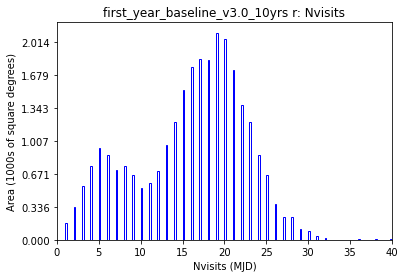

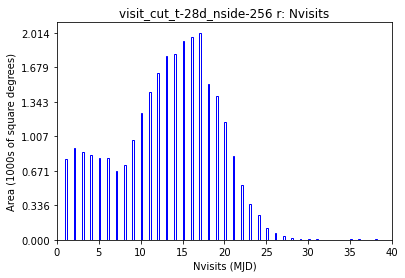

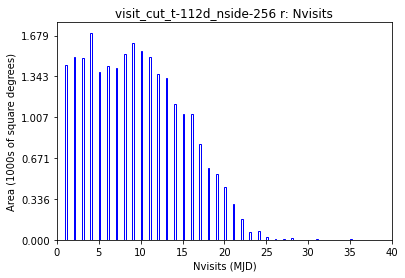

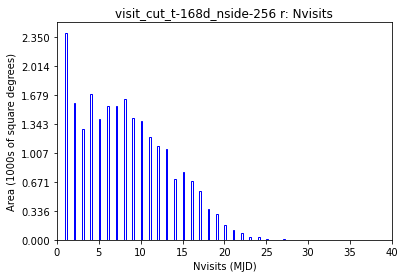

In [34]:
ph = maf.PlotHandler(outDir='temp', thumbnail=False)

plotDict = {'xMin':0, 'xMax':40}

for r in run_dict_visits.keys():
    bdict = run_dict_visits[r]
    
    # for f in 'ugrizy':
    for f in 'r':
        ph.setMetricBundles([bdict[f]])
        ph.plot(plotFunc=maf.HealpixHistogram(), plotDicts=plotDict)

first_year_baseline_v3.0_10yrs r 27800.762703974688
visit_cut_t-28d_nside-256 r 27397.901754273327
visit_cut_t-112d_nside-256 r 25450.74049738342
visit_cut_t-168d_nside-256 r 23020.14610085188


/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/var/folders/6r/3460lbq91j9402dmmk71v61m0000gt/T/ipykernel_91184/2929735343.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:3.0f}'.format(x * pix_area) for x in y_vals])


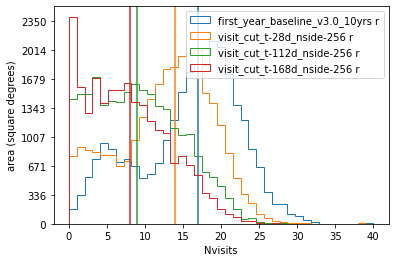

In [35]:
# manually plot the histograms

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])
# bins = "auto"
# bins = 200
bins = np.linspace(0,40,40)
pix_area = hp.pixelfunc.nside2pixarea(nside, degrees=True) # square degrees

for i,r in enumerate(run_dict_visits.keys()):
    bdict = run_dict_visits[r]
    
    # for f in 'ugrizy':
    for f in 'r':
        bundle = bdict[f]
        
        data = bundle.metricValues
        data = data[~data.mask]
        n,b,p = ax1.hist(data, bins = bins, histtype = "step", label = "{} {}".format(r, f))
        
        ax1.axvline(np.median(data),c="C{}".format(i))
        
        # total area
        print(r,f,sum(n)*pix_area)
        

# scale the y axis to get sky area
y_vals = ax1.get_yticks()
ax1.set_yticklabels(['{:3.0f}'.format(x * pix_area) for x in y_vals])

ax1.set_xlabel("Nvisits")
ax1.set_ylabel("area (square degrees)")

# ax1.set_yscale("log")
# ax1.set_xlim(0,50)

ax1.legend()

plt.show()

# look at the area of sky with pairs of visits
Consider all filters for pairs useful for moving object dicovery. Will pairs in the same filter be more relevant for other science cases e.g. supernovae?

In [36]:
run_dict_pairs = {}

for i in range(len(opsim_list)):
    opsdb = maf.OpsimDatabase(opsim_list[i])
    runName = os.path.split(opsdb)[-1].replace('.db', '')
    print(runName)

    bdict = {}
#     for f in 'ugrizy':
    for f in ["all"]:
        m = maf.metrics.pairMetric.PairMetric(mjdCol='observationStartMJD', metricName='Pairs')
        
        if f=="all":
            constraint = None
        else:
            constraint = "filter=={}".format(f) # change this to accept lists?
            
        bdict[f] = maf.MetricBundle(m, hp_slice, constraint, runName=runName)

    g = maf.MetricBundleGroup(bdict, opsdb, 'temp')
    g.runAll()
    
    run_dict_pairs[runName] = bdict

first_year_baseline_v3.0_10yrs
Querying table None with no constraint for columns ['fieldRA', 'rotSkyPos', 'observationStartMJD', 'fieldDec'].
Found 216378 visits
Running:  ['all']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
visit_cut_t-28d_nside-256
Querying table None with no constraint for columns ['fieldRA', 'rotSkyPos', 'observationStartMJD', 'fieldDec'].
Found 155276 visits
Running:  ['all']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
visit_cut_t-112d_nside-256
Querying table None with no constraint for columns ['fieldRA', 'rotSkyPos', 'observationStartMJD', 'fieldDec'].
Found 99281 visits
Running:  ['all']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
visit_cut_t-168d_nside-256
Querying table None with no constraint for columns ['fieldRA', 'rotSkyPos', 'observationStartMJD', 'fieldDec'].
Found 77149 visits
Running:  ['all']
Completed metri

In [37]:
bdict

{'all': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x175365ca0>}

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


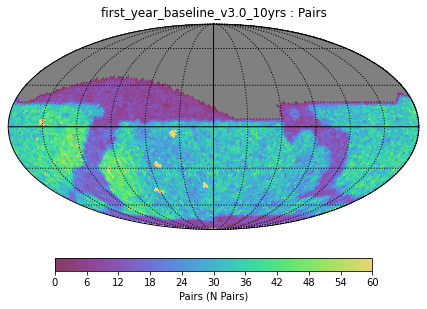

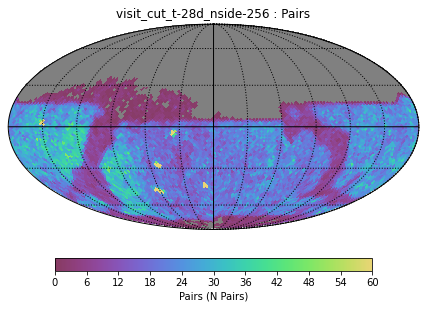

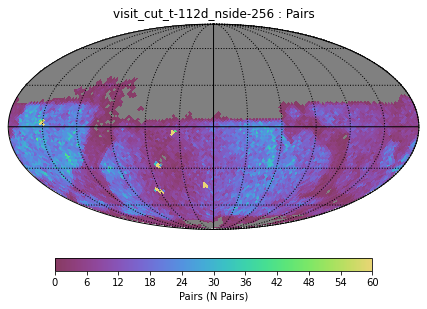

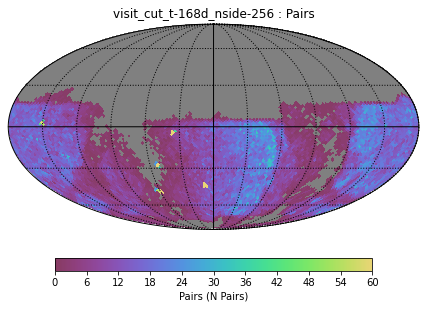

In [38]:
ph = maf.PlotHandler(outDir='temp', thumbnail=False)

plotDict = {'colorMin': 0, 'colorMax': 60}

for r in run_dict_pairs.keys():
    bdict = run_dict_pairs[r]
    
    ph.setMetricBundles([bdict["all"]])
    ph.plot(plotFunc=maf.HealpixSkyMap(), plotDicts=plotDict)

/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 419 bins, returning 200
  warnings.warn(
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 505 bins, returning 200
  warnings.warn(
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 328 bins, returning 200
  warnings.warn(
/Users/jrobinson/miniconda3/envs/rubin/lib/python3.9/site-packages/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 290 bins, returning 200
  warnings.warn(


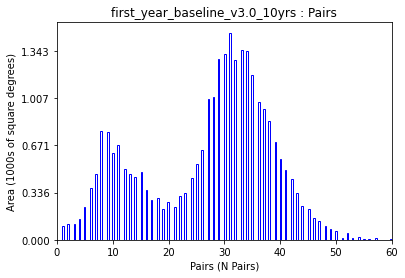

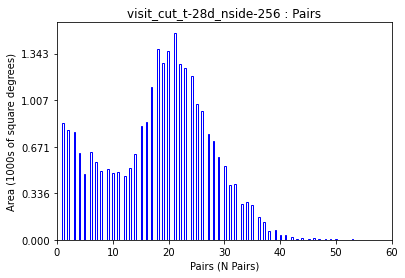

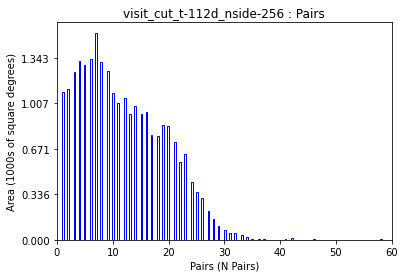

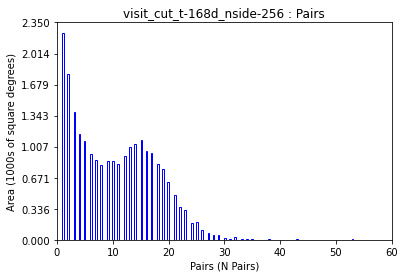

In [39]:
ph = maf.PlotHandler(outDir='temp', thumbnail=False)

plotDict = {'xMin':0, 'xMax':60}

for r in run_dict_pairs.keys():
    bdict = run_dict_pairs[r]
 
    ph.setMetricBundles([bdict["all"]])    
    ph.plot(plotFunc=maf.HealpixHistogram(), plotDicts=plotDict)

In [40]:
# look at the area covered by templates, similar to lynne notebook
# use healpix slicer on database redacted template database
# find the night of the first image available for each healpix

In [41]:
# Check discovery of solar system objects: DiscoveryMetric
# but this only works for a given orbit?